In [111]:
import os
import warnings
import numpy as np
import torch
from torch.utils import data
import torchvision
from PIL import Image
from sklearn import manifold
import matplotlib.pyplot as plt
import seaborn as sns
import argparse
NumWorkers = 4
plt.rcParams['font.sans-serif'] = ['SimHei']
# mpl.rcParams['axes.unicode_minus'] = False

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


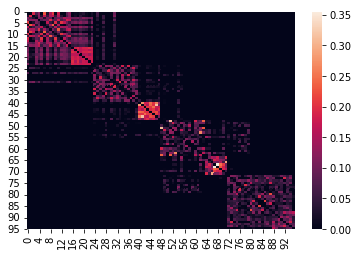

In [112]:
data = np.loadtxt("./data_select.csv",delimiter = ",")
W = np.loadtxt("./W.csv",delimiter = ",")
node_num = np.size(W,1)
for i in range(node_num):
    for j in range(i+1,node_num):
        if 0<=i<24 and j>=32:
            W[i,j] = 0
            W[j,i] = 0
        if 24<=i<48 and j>=56:
            W[i,j] = 0
            W[j,i] = 0
        if 48<=i<72 and j>=80:
            W[i,j] = 0
            W[j,i] = 0
    
ax = sns.heatmap(W)

In [84]:
def visual(feat):

    ts = manifold.TSNE(n_components=2, init='pca', random_state=0)

    x_ts = ts.fit_transform(feat)

    print(x_ts.shape)  # [num, 2]

    x_min, x_max = x_ts.min(0), x_ts.max(0)

    x_final = (x_ts - x_min) / (x_max - x_min)

    return x_final

(96, 2)
(96, 2)
(96, 2)
s: 0
d: 24
s: 24
d: 48
s: 48
d: 72
s: 72
d: 96
s: 0
d: 24
s: 24
d: 48
s: 48
d: 72
s: 72
d: 96
s: 0
d: 24
s: 24
d: 48
s: 48
d: 72
s: 72
d: 96


Text(0.5, 1.0, '$\\xi = 1$')

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


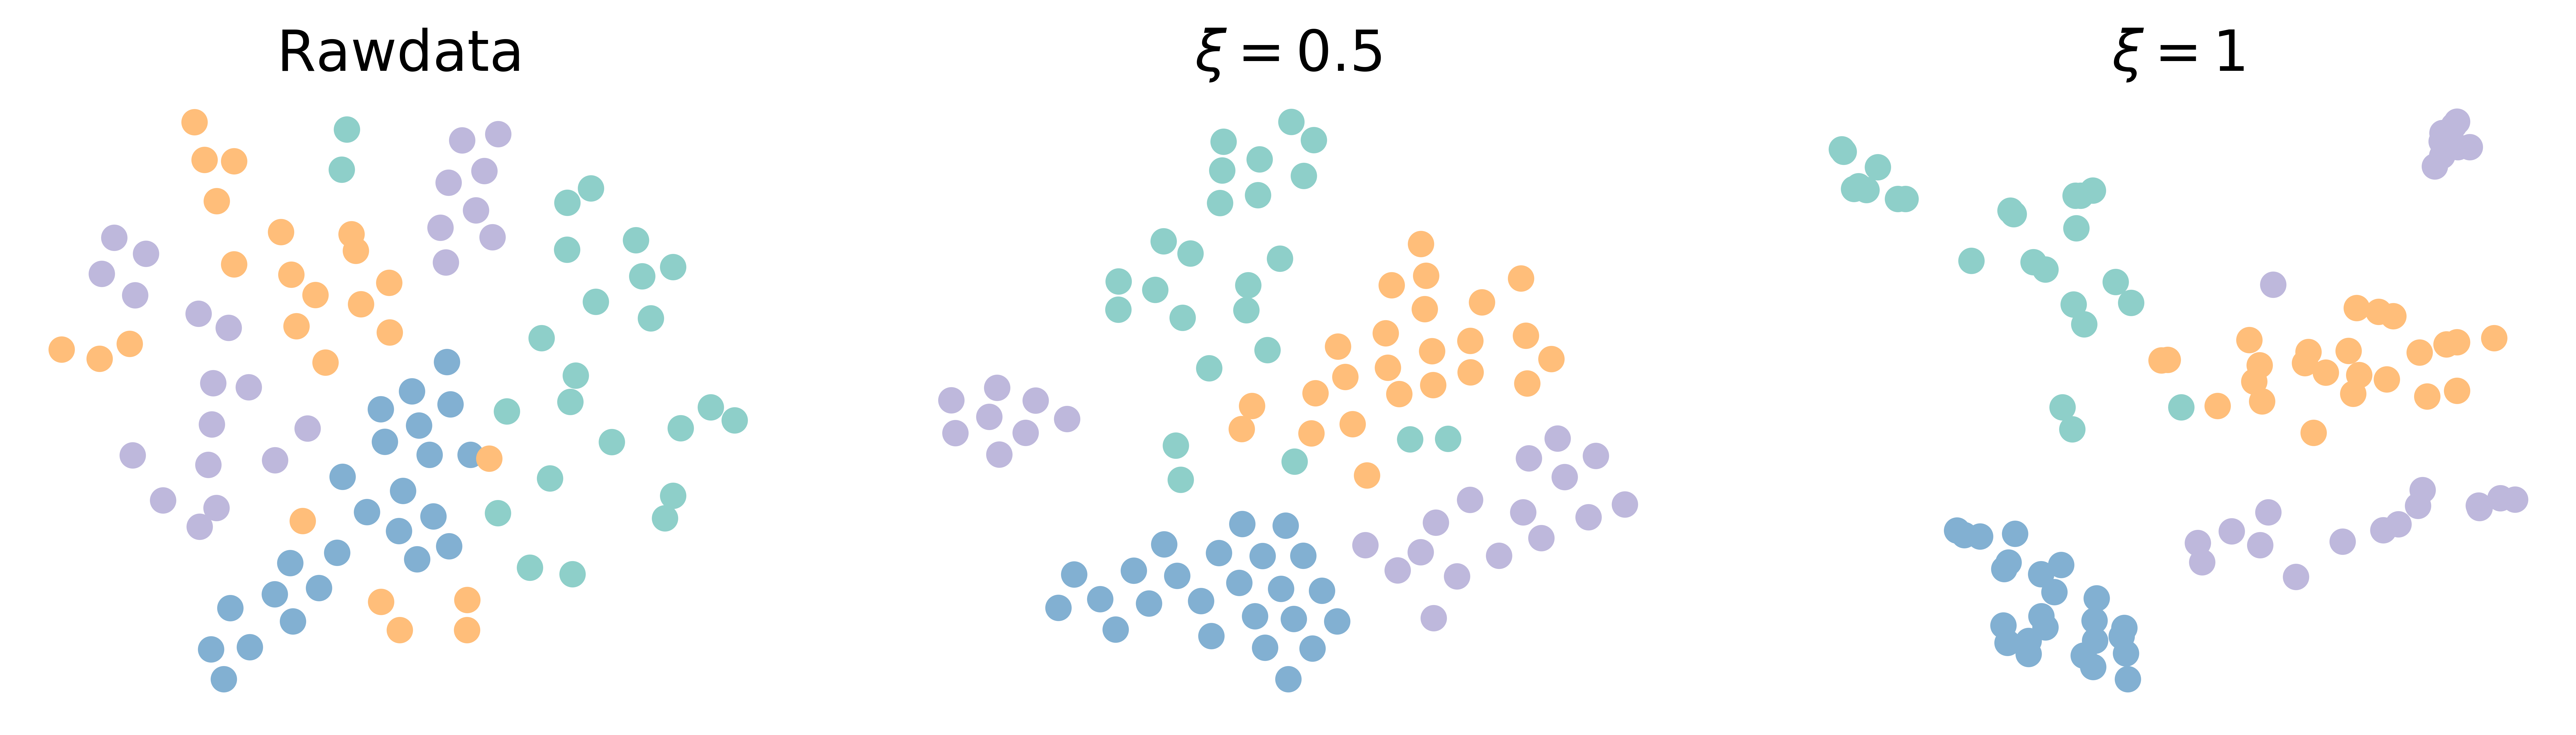

In [109]:
colors = ["#82B0D2", "#BEB8DC", "#8ECFC9", "#FFBE7A", "#218C74","#999999","#2878B5","#F0932B", "#FA7F6F"];
Label_Com = ['1', '2', '3', '4']
# plt.rc('font',family='Times New Roman')
embedding_raw = visual(data)

##Filter data

D = np.diag(np.sum(W,1))
L = D-W
I = np.eye(node_num)


K_1 = np.linalg.inv(I + 0.5*L)
data_filter_1 = np.dot(K_1,data)
embedding_1 = visual(data_filter_1)

K_2 = np.linalg.inv(I + 1*L)
data_filter_2 = np.dot(K_2,data)
embedding_2 = visual(data_filter_2)


plt.figure(figsize=(12,3),dpi = 1000)
plt.axis('off')
ax1 = plt.subplot(1,3,1)
for i in range(4):
    s = i * 24
    print("s:", s)
    d = s + 24 
    print("d:", d)
    X = embedding_raw[s:d,0]
    Y = embedding_raw[s:d,1]
    l = i+1;
    
    plt.scatter(X, Y,  marker='o', c=colors[i],  alpha=1)
    plt.axis('off')
    plt.xticks([])  # 去掉横坐标值
    plt.yticks([])  # 去掉纵坐标值
ax1.set_title(r'$\mathrm{Raw data}$', fontdict={'family' : 'Times New Roman', 'size'   : 15})
    

ax2 = plt.subplot(1,3,2)
for i in range(4):
    s = i * 24
    print("s:", s)
    d = s + 24 
    print("d:", d)
    X = embedding_1[s:d,0]
    Y = embedding_1[s:d,1]
    l = i+1;
    
    plt.scatter(X, Y,  marker='o', c=colors[i],  alpha=1)
    
    plt.axis('off')
    plt.xticks([])  # 去掉横坐标值
    plt.yticks([])  # 去掉纵坐标值
ax2.set_title(r'$\xi = 0.5$', fontdict={'family' : 'Times New Roman', 'size'   : 15})
    
ax3 = plt.subplot(1,3,3)
for i in range(4):
    s = i * 24
    print("s:", s)
    d = s + 24 
    print("d:", d)
    X = embedding_2[s:d,0]
    Y = embedding_2[s:d,1]
    l = i+1;
    
    plt.scatter(X, Y,  marker='o', c=colors[i],  alpha=1)
    plt.axis('off')
    plt.xticks([])  # 去掉横坐标值
    plt.yticks([])  # 去掉纵坐标值
ax3.set_title(r'$\xi = 1$', fontdict={'family' : 'Times New Roman', 'size'   : 15})  
    

In [45]:
D = np.diag(np.sum(W,1))
L = D-W

In [54]:
C = np.array([[2,0,0],[0,4,0],[0,0,8]])
C**(-0.5)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  


array([[0.70710678,        inf,        inf],
       [       inf, 0.5       ,        inf],
       [       inf,        inf, 0.35355339]])

In [57]:
 np.abs(-1)

1